In [6]:
# importing libraries
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading data
data = pd.read_csv('Data/melb_data.csv')

In [4]:
# preparing features
features = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[features]

# preparing target
y = data.Price

In [7]:
# defining function for evaluating MAEs using cross-validation
def score_model(n_estimators):
    # defining pipeline
    house_pricing_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    
    # cross-validation
    scores = -1 * cross_val_score(house_pricing_pipeline, X, y, cv=3, scoring='neg_mean_absolute_error')
    
    # return mean of MAEs
    return scores.mean()

## Testing

In [9]:
# defining list of estomators for model
n_estimators_list = [50, 100, 150, 200, 250, 300, 350, 400]

# calling 'score_model' function and save results in dictionary
results = {n: score_model(n) for n in n_estimators_list}

Text(0, 0.5, 'Score')

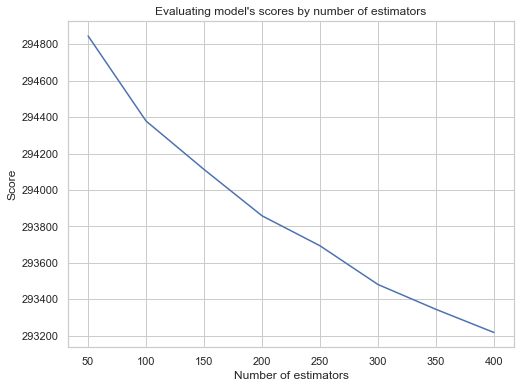

In [14]:
# visualizing results

# plot area size
plt.figure(figsize=(8,6))

# style
sns.set_theme(style="whitegrid")

# plot title
plt.title("Evaluating model's scores by number of estimators")

# define barplot
lineplot = sns.lineplot(data=results)

# axis labels
plt.xlabel("Number of estimators")
plt.ylabel("Score")

In [15]:
results

{50: 294846.1550120387,
 100: 294378.84361591726,
 150: 294112.9943328616,
 200: 293858.58135938307,
 250: 293693.9694143582,
 300: 293481.32195318816,
 350: 293344.88662699756,
 400: 293217.8708162901}